# Feature engineering sur questions.csv avec les données de train_1M

Dans un premier temps on ne fait du features engineering sur les questions que sur la base des infos d'historique contenues dans le subset de données de 1 million train_csv

In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,categories='auto')

In [3]:
train_1M=pd.read_csv('train_1M.csv')

In [4]:
train_1M[['answernull','answer0','answer1','answer2','answer3']]=encoder.fit_transform(train_1M[['user_answer']])

In [5]:
train_1M[['answernull','answer0','answer1','answer2','answer3']]=train_1M[['answernull','answer0','answer1','answer2','answer3']].astype('int8')

In [6]:
train_1M.prior_question_had_explanation=train_1M.prior_question_had_explanation.apply(lambda x:1 if x==True else 0)

In [34]:
train_1M['user_activity_cumcount']=train_1M.groupby('user_id').cumcount()

In [35]:
train_1M

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,answernull,answer0,answer1,answer2,answer3,user_activity_cumcount
0,90286654,90286654,0,1917429896,7900,0,0,0,1,NaN,0,0,1,0,0,0,0
1,90286655,90286655,26511,1917429896,7876,0,1,2,0,21000.0,0,0,0,0,1,0,1
2,90286656,90286656,55312,1917429896,175,0,2,0,0,21000.0,0,0,1,0,0,0,2
3,90286657,90286657,102436,1917429896,1278,0,3,0,0,23000.0,0,0,1,0,0,0,3
4,90286658,90286658,188454,1917429896,2063,0,4,3,0,45000.0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987264,47484293,47484293,1619704,1003849974,6909,0,14,0,1,17000.0,0,0,1,0,0,0,25
987265,47484294,47484294,1906094,1003849974,7217,0,15,2,1,68500.0,0,0,0,0,1,0,26
987266,47484295,47484295,1906094,1003849974,7216,0,15,3,1,68500.0,0,0,0,0,0,1,27
987267,47484296,47484296,1906094,1003849974,7219,0,15,2,1,68500.0,0,0,0,0,1,0,28


In [41]:
questions_stats=train_1M.query('content_type_id==0')\
                    .groupby('content_id').agg({'answered_correctly': 'mean',
                                                'content_type_id': 'count',
                                                'task_container_id': ['min','max'],
                                                'user_answer':'max',
                                                'timestamp': 'mean',
                                                'user_activity_cumcount': 'mean',
                                                 'prior_question_had_explanation': 'mean',
                                                 'prior_question_elapsed_time': 'mean',
                                                 'answer0': 'mean',
                                                 'answer1': 'mean',
                                                 'answer2': 'mean',
                                                 'answer3': 'mean',
                                                               })

In [42]:
questions_stats.rename(columns={'content_type_id':'count',
                                'user_answer':'answers'},inplace=True)

In [43]:
questions_stats

answered_correctly count task_container_id       answers  \
                         mean count               min   max     max   
content_id                                                            
0                    0.886076    79                 5  3724       3   
1                    0.842857    70                 9  3868       3   
2                    0.544355   496                 2  7759       3   
3                    0.741935   217                 1  7075       3   
4                    0.612378   307                 1  5701       3   
...                       ...   ...               ...   ...     ...   
13518                0.857143     7                27  7076       3   
13519                0.500000     6                60  6559       3   
13520                0.555556     9                21  7087       3   
13521                0.888889     9                24  7085       1   
13522                0.900000    10                32  9029       3   

               timestamp user_activity_cumcount  \
                    mean                   mean   
content_id                                        
0           8.991699e+09             662.481013   
1           9.469249e+09             798.971429   
2           4.552578e+09             384.544355   
3           5.898622e+09             606.815668   
4           4.333422e+09             349.990228   
...                  ...                    ...   
13518       1.941301e+10            2521.142857   
13519       2.356377e+10            1680.166667   
13520       2.417656e+10            2518.333333   
13521       3.176299e+10            3209.000000   
13522       2.144617e+10            2307.200000   

           prior_question_had_explanation prior_question_elapsed_time  \
                                     mean                        mean   
content_id                                                              
0                                0.962025                21746.835443   
1                                1.000000                20214.285714   
2                                0.883065                23495.594758   
3                                0.940092                23127.336406   
4                                0.469055                23797.553746   
...                                   ...                         ...   
13518                            1.000000                20857.142857   
13519                            1.000000                13000.000000   
13520                            1.000000                16555.555556   
13521                            1.000000                24777.777778   
13522                            1.000000                24600.000000   

             answer0   answer1   answer2   answer3  
                mean      mean      mean      mean  
content_id                                          
0           0.886076  0.063291  0.012658  0.037975  
1           0.114286  0.842857  0.014286  0.028571  
2           0.544355  0.016129  0.157258  0.282258  
3           0.741935  0.009217  0.023041  0.225806  
4           0.061889  0.179153  0.146580  0.612378  
...              ...       ...       ...       ...  
13518       0.000000  0.000000  0.142857  0.857143  
13519       0.000000  0.500000  0.000000  0.500000  
13520       0.111111  0.111111  0.555556  0.222222  
13521       0.888889  0.111111  0.000000  0.000000  
13522       0.000000  0.000000  0.100000  0.900000  

[13066 rows x 13 columns]

In [44]:
questions_stats.to_csv('questions_stats_1M')

# Correlations des stats par questions

In [46]:
import seaborn as sns

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

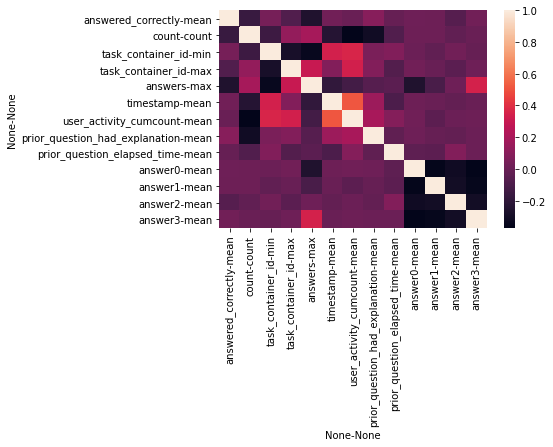

In [48]:
sns.heatmap(questions_stats.corr())

In [50]:
questions_stats.corr().answered_correctly

mean
answered_correctly             mean   1.000000
count                          count -0.162240
task_container_id              min    0.045431
                               max   -0.079350
answers                        max   -0.257114
timestamp                      mean   0.030368
user_activity_cumcount         mean   0.003224
prior_question_had_explanation mean   0.099103
prior_question_elapsed_time    mean  -0.007275
answer0                        mean   0.016075
answer1                        mean   0.011170
answer2                        mean  -0.060341
answer3                        mean   0.028244

# Exploration sur une q° donnée

In [36]:
question_id=6116

/Users/thomasmathieu/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/thomasmathieu/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(close=None, block=None)>

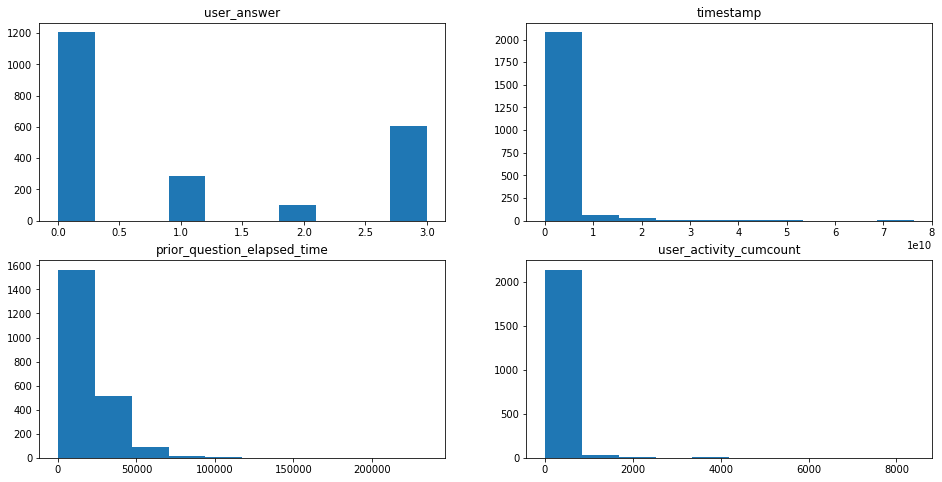

In [38]:
subset=train_1M.query('content_id==@question_id')

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.hist(subset.user_answer)
plt.title('user_answer')

plt.subplot(2,2,2)
plt.hist(subset.timestamp)
plt.title('timestamp')

plt.subplot(2,2,3)
plt.hist(subset.prior_question_elapsed_time)
plt.title('prior_question_elapsed_time')

plt.subplot(2,2,4)
plt.hist(subset.user_activity_cumcount)
plt.title('user_activity_cumcount')

plt.show


In [17]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter()

# Exploration serie typique

In [66]:
max_count=train_1M.user_activity_cumcount.max()
most_active_user_id=train_1M.query('user_activity_cumcount==@max_count').user_id.values[0]
train_1M.query('user_id==@most_active_user_id').head(60)

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,answernull,answer0,answer1,answer2,answer3,user_activity_cumcount
505408,77105331,77105331,0,1641944791,6068,0,0,3,0,NaN,0,0,0,0,0,1,0
505409,77105332,77105332,82826,1641944791,4265,0,1,1,0,50000.0,0,0,0,1,0,0,1
505410,77105333,77105333,102392,1641944791,4305,0,2,1,0,18000.0,0,0,0,1,0,0,2
505411,77105334,77105334,118843,1641944791,4067,0,3,1,1,16000.0,0,0,0,1,0,0,3
505412,77105335,77105335,138018,1641944791,4748,0,4,1,0,13000.0,0,0,0,1,0,0,4
505413,77105336,77105336,166859,1641944791,4544,0,5,1,0,16000.0,0,0,0,1,0,0,5
505414,77105337,77105337,179772,1641944791,5183,0,6,2,0,26000.0,0,0,0,0,1,0,6
505415,77105338,77105338,337278,1641944791,481,0,7,0,1,10000.0,0,0,1,0,0,0,7
505416,77105339,77105339,364937,1641944791,472,0,8,0,1,20000.0,1,0,1,0,0,0,8
505417,77105340,77105340,392769,1641944791,1339,0,9,1,1,19000.0,1,0,0,1,0,0,9


# Est-ce qu'un même utilisateur a parfois plusieurs fois la même question ?

In [74]:
array=train_1M.query('content_type_id==0')[['user_id','content_id']].values
liste=[(array[i,0],array[i,1]) for i in range(array.shape[0])]
print('total',len(liste))
print('uniques',len(set(liste)))

total 967834
uniques 853730


Oui, sur 967k lignes avec question, il y a 114k fois où ce n'était pas la première fois que le mec voyait la question

In [77]:
train_1M['user_content_tuple']=[(train_1M.user_id.iloc[i],train_1M.content_id.iloc[i]) for i in range(len(train_1M))]
train_1M['already_seen']=train_1M.groupby('user_content_tuple').cumcount()
train_1M.drop(columns='user_content_tuple',inplace=True)
train_1M

In [87]:
train_1M.query('content_type_id==0').groupby('already_seen').agg({'answered_correctly':'mean'})

,answered_correctly
already_seen,
0,0.643893
1,0.752326
2,0.751521
3,0.753501
4,0.749469
5,0.748148
6,0.695455
7,0.735294
8,0.515152


<AxesSubplot:xlabel='already_seen'>

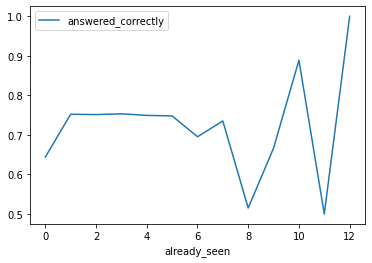

In [91]:
train_1M.query('content_type_id==0').groupby('already_seen').agg({'answered_correctly':'mean'}).plot()

In [90]:
train_1M.query('content_type_id==0')[['already_seen','row_id']].groupby('already_seen').count()

,row_id
already_seen,
0,853225
1,88899
2,18734
3,4641
4,1413
5,540
6,220
7,102
8,33


On dirait que la seule donnée pertinente concernele gap entre les questions 0 et 1 fois déjà vues. Donc en encode en 0,1 cette information : déjà vue ou non

<AxesSubplot:xlabel='already_seen'>

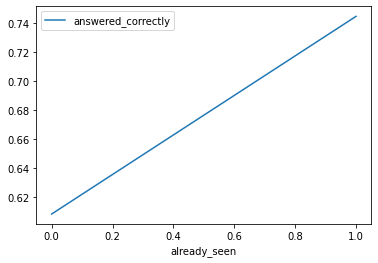

In [93]:
train_1M['already_seen']=train_1M['already_seen'].apply(lambda x:1 if x>=1 else 0)
train_1M.groupby('already_seen').agg({'answered_correctly':'mean'}).plot()

# Est-ce que ça aide d'avoir fait des lectures ?

In [124]:
train_1M['lectures_seen']=train_1M.groupby('user_id').cumsum()['content_type_id']

(0.0, 50.0)

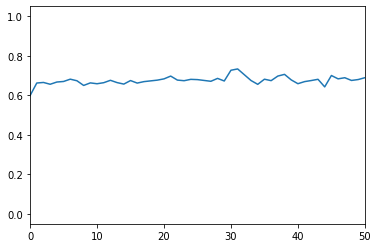

In [121]:
plt.plot(train_1M.query('content_type_id==0').groupby('lectures_seen').mean()['answered_correctly'])
plt.xlim(0,50)

(array([2.39341e+05, 6.44870e+04, 4.57540e+04, 3.64930e+04, 3.22590e+04,
        3.30310e+04, 3.06400e+04, 2.41120e+04, 2.35780e+04, 1.93100e+04,
        1.65870e+04, 1.65970e+04, 1.66560e+04, 1.53500e+04, 1.29580e+04,
        1.18120e+04, 1.08790e+04, 9.31200e+03, 1.08010e+04, 1.09010e+04,
        1.22960e+04, 8.60600e+03, 7.63600e+03, 7.17100e+03, 7.97800e+03,
        7.89000e+03, 7.48200e+03, 8.00400e+03, 7.08900e+03, 6.25700e+03,
        1.16940e+04, 8.86600e+03, 6.34900e+03, 5.36300e+03, 4.96000e+03,
        7.18800e+03, 5.99400e+03, 5.47800e+03, 6.40700e+03, 3.18200e+03,
        3.28700e+03, 3.38800e+03, 2.49300e+03, 3.04700e+03, 3.96600e+03,
        4.13800e+03, 3.07800e+03, 4.02000e+03, 3.80600e+03, 2.87900e+03,
        4.13900e+03, 2.87200e+03, 2.62800e+03, 2.88400e+03, 2.27000e+03,
        2.14600e+03, 3.15200e+03, 3.20100e+03, 2.24000e+03, 1.92200e+03,
        2.14900e+03, 1.96300e+03, 1.85900e+03, 1.87000e+03, 1.64700e+03,
        1.43000e+03, 3.36800e+03, 1.88300e+03, 1.90

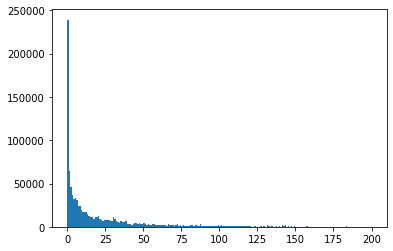

In [119]:
plt.hist(train_1M['lectures_seen'],bins=200)

# Présence d'une lecture dans le même task_container_id

In [130]:
train_1M['lectures_seen_in_same_task_container']=train_1M.groupby(['user_id','task_container_id']).cumsum()['content_type_id']
train_1M.query('content_type_id==0').groupby('lectures_seen_in_same_task_container').mean()
train_1M.lectures_seen_in_same_task_container

0         0
1         0
2         0
3         0
4         0
         ..
987264    0
987265    0
987266    0
987267    0
987268    0
Name: lectures_seen_in_same_task_container, Length: 987269, dtype: int64

(array([967834.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  19435.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

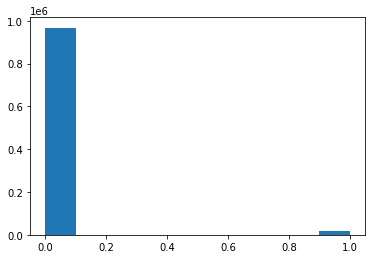

In [131]:
plt.hist(train_1M.lectures_seen_in_same_task_container)

# Ménage dans les features

In [95]:
train_1M_clean=train_1M.drop(columns=['Unnamed: 0','answernull','user_answer'])

# Idem avec le full train set

## Attention : trop gourmand en RAM, à faire tourner plus tard

In [11]:
train=pd.read_csv('../data/train.csv')
train[['answernull','answer0','answer1','answer2','answer3']]=encoder.fit_transform(train[['user_answer']])
train[['answernull','answer0','answer1','answer2','answer3']]=train[['answernull','answer0','answer1','answer2','answer3']].astype('int8')
train.prior_question_had_explanation=train.prior_question_had_explanation.apply(lambda x:1 if x==True else 0)

questions_stats_100M=train.query('content_type_id==0').groupby('content_id').agg({'content_type_id': 'count',
                                                                'task_container_id': ['min','max'],
                                                                'timestamp': 'mean',
                                                                 'answered_correctly': 'mean',
                                                                 'prior_question_had_explanation': 'mean',
                                                                 'prior_question_elapsed_time': 'mean',
                                                                 'answer0': 'mean',
                                                                 'answer1': 'mean',
                                                                 'answer2': 'mean',
                                                                 'answer3': 'mean',
                                                               })
questions_stats_100M.rename(columns={'content_type_id':'count'},inplace=True)

KeyboardInterrupt: 